In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the Dataset
# Replace with the actual path to your dataset
data = pd.read_csv('C:\\Users\\sanjh\\Downloads\\car data.csv', encoding='latin1')

# Inspect the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(data.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85       

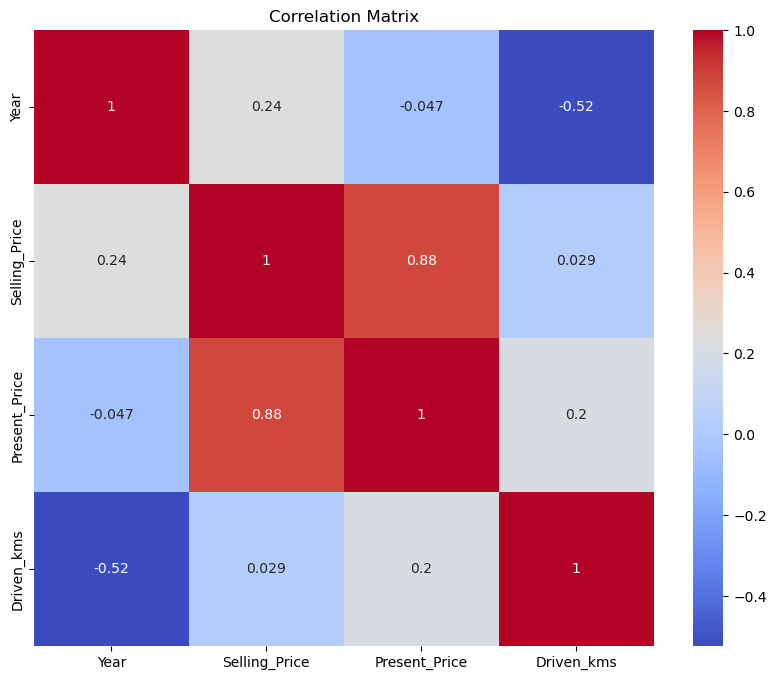

In [27]:
# Visualize correlations (numerical columns only)
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

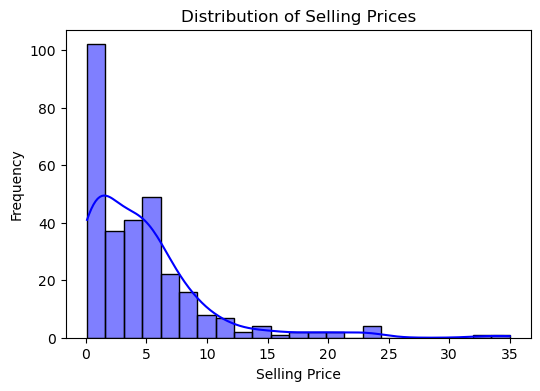

In [29]:
# Distribution of selling prices
plt.figure(figsize=(6, 4))
sns.histplot(data['Selling_Price'], kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


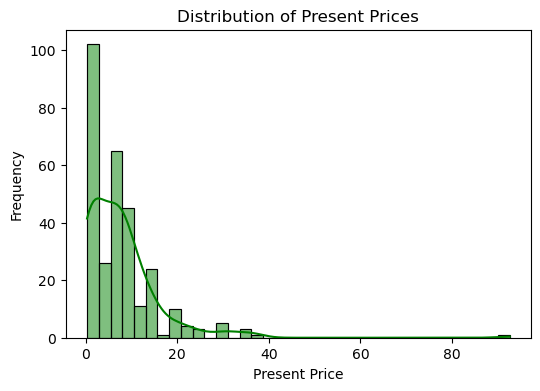

In [31]:
# Distribution of present prices
plt.figure(figsize=(6, 4))
sns.histplot(data['Present_Price'], kde=True, color='green')
plt.title('Distribution of Present Prices')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Step 3: Data Preprocessing
# Select features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Model Training with Pipeline
# Create a pipeline with preprocessing and a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Numerical Features: Index(['Year', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')
Categorical Features: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

Model Performance:
Mean Squared Error: 1.2034803958241764
R-squared Score: 0.957734357020555


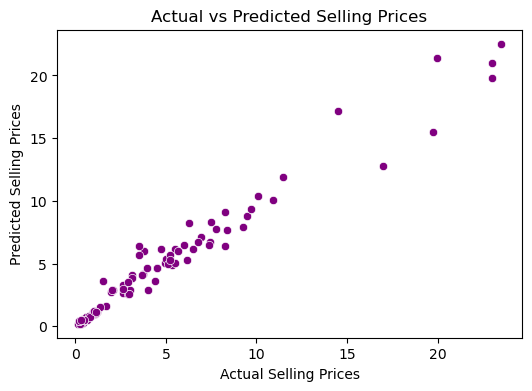

In [35]:
# Visualize actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.show()

In [11]:
# Step 6: Save the Model (Optional)
import pickle
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)
